
<style>
    .blue {
        background-color: #0074D9;
    }
    .green {
        background-color: #2ECC40;
    }
</style>

# <font color='blue'>Lending Club Case Study</font>

### Goal
Minimize the risk of losing money while lending to customers.
### Problem Statement
The given data contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns that indicate if a person is likely to| default, which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate, etc.
### Target
Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loans.
### Risk associated with the problem
 - If the applicant is likely to repay the loan, then not approving the loan is a loss of business (rejecting loans for non-default).
 - If the applicant is not likely to repay the loan, then approving the loan may lead to financial loss (approving loans for default).
The given dataset contains information about past loans and each row represents the loan details of the applicants.

### <font color='blue'>Importing Libraries</font>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore',  category=DeprecationWarning)

### <font color='blue'>Loading dataset</font>

In [64]:
df = pd.read_csv('loan.csv')
df.head()

C:\Users\spoon\AppData\Local\Temp\ipykernel_17336\3318210521.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [65]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',df.shape[1])
print('Number of Rows:',df.shape[0])
## Number of missing values
print('Number of missing values:',df.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',df.nunique().sum())
## Number of duplicates
print('Number of duplicates:',df.duplicated().sum())

print('-------------')
# Basic infomation about the dataframe
print(df.info())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


> `Dataset has too many rows and columns, we need to evaluate if all of the columns are useful`

### <font color='blue'>Dropping columns with mostly missing values</font>


In [66]:
nan_percent = round(100*df.isnull().mean(), 2)
nan_percent

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

> `We can immediately see some columns with 100% NaN values, we can start by getting rid of them in the next step. We are keeping NaN threshold as 50%`

In [67]:
threshold = 50
columns_to_drop = nan_percent[nan_percent > threshold].index
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [68]:
df = df.drop(columns=columns_to_drop)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


> `Only 54 columns left now, lets see if anything else with high NaN count is left`

In [69]:
round(100*df.isnull().mean(), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

>`NaN count for desc seems unusually high. In the next step we will try to see if the column has meaningful data`

In [70]:
df['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [71]:
df['desc'].tail()

39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, dtype: object

> `*desc* is basically description of the loan, and doesnt seem to have consistent data. With **32%** of it being NAN, we are going to drop it`

In [72]:
df = df.drop(columns='desc')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [73]:
df.shape

(39717, 53)

### <font color='blue'> Cleaning remaining missing values</font>

>` With all the columns with high NaN count removed, lets see if we can get rid of remaining missing values by getting rid of some rows.`

In [74]:
rows_with_nan = df.isnull().any(axis=1)
percent_rows_with_nan = (rows_with_nan.sum() * 100) / df.shape[0]
percent_rows_with_nan

8.273535261978498

> We can safely drop columns with any null values now, since we will be dropping only 8% of the data, 
and will still have enough meaningful data

In [75]:
df = df.dropna(how='any')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [76]:
df.shape

(36431, 53)

In [77]:
round(100*df.isnull().mean(), 2)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

> `NaN values have been taken care of now, lets see if we can find any meaningful relationship in the data`

In [78]:
df.nunique()

id                            36431
member_id                     36431
loan_amnt                       863
funded_amnt                    1024
funded_amnt_inv                7472
term                              2
int_rate                        333
installment                   14365
grade                             7
sub_grade                        35
emp_title                     28205
emp_length                       11
home_ownership                    4
annual_inc                     4923
verification_status               3
issue_d                          51
loan_status                       3
pymnt_plan                        1
url                           36431
purpose                          14
title                         17952
zip_code                        805
addr_state                       48
dti                            2857
delinq_2yrs                      11
earliest_cr_line                510
inq_last_6mths                    9
open_acc                    

> `Interestingly, alot of columns have just 1 unique value. Lets have a look at these values`

In [79]:
df.loc[:, df.nunique() == 1].head()

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
6,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [80]:
df = df.loc[:, df.nunique() > 1]
df.nunique()

id                         36431
member_id                  36431
loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7472
term                           2
int_rate                     333
installment                14365
grade                          7
sub_grade                     35
emp_title                  28205
emp_length                    11
home_ownership                 4
annual_inc                  4923
verification_status            3
issue_d                       51
loan_status                    3
url                        36431
purpose                       14
title                      17952
zip_code                     805
addr_state                    48
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util                  1082
total_acc 

In [81]:
df.shape

(36431, 44)

> `These final 44 columns seem like they are meaningful for analysis purpose, but there are still some columns like *id* which we can get rid of. Lets list them down`
> > - id : A unique LC assigned ID for the loan listing.
> > - member_id : A unique LC assigned Id for the borrower member.
> > -  url : URL for the LC page with listing data.

In [82]:
df = df.drop(columns=['id', 'member_id', 'url'])
df.shape

(36431, 41)

### <font color='blue'> Understanding columns</font>

In [83]:
df.nunique()

loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7472
term                           2
int_rate                     333
installment                14365
grade                          7
sub_grade                     35
emp_title                  28205
emp_length                    11
home_ownership                 4
annual_inc                  4923
verification_status            3
issue_d                       51
loan_status                    3
purpose                       14
title                      17952
zip_code                     805
addr_state                    48
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util                  1082
total_acc                     79
out_prncp                   1064
out_prncp_inv               1065
total_pymn

### `Observations`
* We can get rid of columns like emp_title, and title as they contain non-numerical data with really high variance, not useful other than metadata
* Since addr_state is present, we can get rid of zip_code
* Seeing many amount values, like loan_amt, funded_amt, funded_amt_inv, etc. , we need to see if there is any correlation and get rid of redundant columns
* There are many categorical variables as well like the term, grade, sub_grade etc., need to find a correlation here as well

In [84]:
categorical = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 
               'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'last_pymnt_d', 
              'last_credit_pull_d', 'pub_rec_bankruptcies']
numerical = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 
             'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
            'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
extra = ['emp_title', 'title', 'zip_code']

In [85]:
df = df.drop(columns=extra)

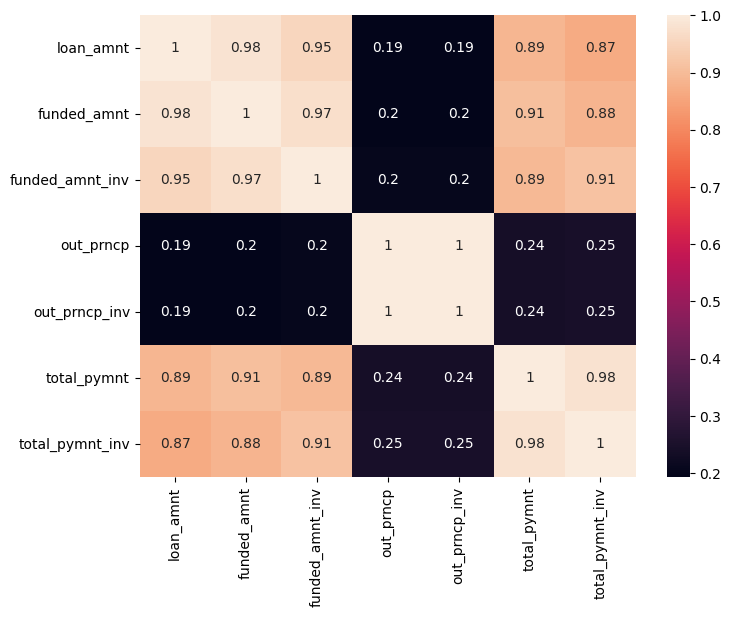

In [86]:
df_amt = df.loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv']]
plt.figure(figsize=(8,6))
sns.heatmap(df_amt.corr(), annot=True)
plt.show()

> * We can clearly see that `loan_amt` is highly correlated with `funded_amt`, `funded_amt_inv`, `total_pymnt` and `total_pymnt_inv`
>
> * Also, `out_prncp` is correlated with `out_prncp_inv`
> 
> We can just keep `loan_amt` and `out_prncp` out of the above 7

In [87]:
df = df.drop(columns= ['funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv'])
df.shape

(36431, 33)

In [88]:
df.nunique()

loan_amnt                    863
term                           2
int_rate                     333
installment                14365
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 4
annual_inc                  4923
verification_status            3
issue_d                       51
loan_status                    3
purpose                       14
addr_state                    48
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util                  1082
total_acc                     79
out_prncp                   1064
total_rec_prncp             7253
total_rec_int              32521
total_rec_late_fee          1194
recoveries                  3584
collection_recovery_fee     2386
last_pymnt_d                  97
last_pymnt

> Converting `revol_util` and `int_rate` from percent to float, so that we can evaluate correlation for other numerical fields

In [89]:
df['revol_util']

1         9.40%
3           21%
4        53.90%
5        28.30%
6        85.60%
          ...  
39433    47.40%
39475    18.60%
39551    96.50%
39562    68.70%
39623    62.90%
Name: revol_util, Length: 36431, dtype: object

In [90]:
def convert_percentage(value):
    if isinstance(value, str):  # Check if value is a string
        return float(value.split('%')[0])
    else:
        return value  # If value is not a string, return it unchanged


In [91]:
df['revol_util'] = df['revol_util'].apply(convert_percentage)
df['revol_util']

1         9.4
3        21.0
4        53.9
5        28.3
6        85.6
         ... 
39433    47.4
39475    18.6
39551    96.5
39562    68.7
39623    62.9
Name: revol_util, Length: 36431, dtype: float64

In [92]:
df['int_rate'] = df['int_rate'].apply(lambda value: float(value.split('%')[0]))
df['int_rate']

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39433     9.83
39475     9.01
39551    10.91
39562    10.28
39623    12.49
Name: int_rate, Length: 36431, dtype: float64

In [93]:
categorical = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 
               'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'last_pymnt_d', 
              'last_credit_pull_d', 'pub_rec_bankruptcies']
numerical = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 
             'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
            'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']

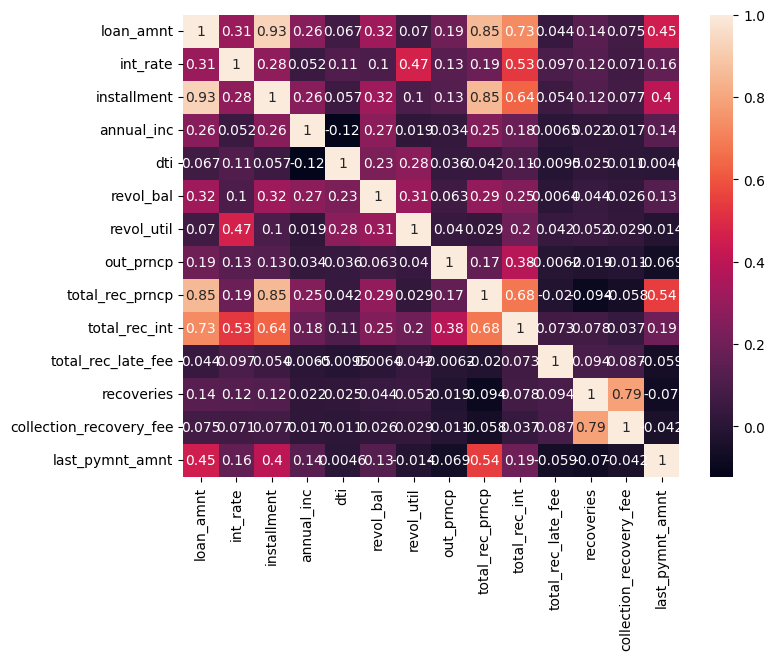

In [94]:
df_numerical = df.loc[:, numerical]
plt.figure(figsize=(8,6))
sns.heatmap(df_numerical.corr(), annot=True)
plt.show()

> We can clearly see some high correlation, eliminating columns which are correlated by others, atleast 75%
>
> * `installement` is highly correlated with `loan_amnt`, hence will drop `installment`
> 
> * `total_rec_prncp` is also similarly having high correlation wil `loan_amt`, will drop it
> 
> * `collection_recovery_fee` has high correlation with `recoveries`

In [95]:
df = df.drop(columns=['installment', 'total_rec_prncp', 'collection_recovery_fee'])
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,9.4,4,0.00,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,...,21.0,37,0.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,...,53.9,38,524.06,1037.39,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,...,28.3,12,0.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,...,85.6,11,0.00,3125.23,0.00,0.00,May-16,1313.76,May-16,0.0


In [96]:
df.shape

(36431, 30)

In [97]:
categorical = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 
               'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'last_pymnt_d', 
              'last_credit_pull_d', 'pub_rec_bankruptcies']
numerical = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 
             'out_prncp', 'total_rec_int', 'total_rec_late_fee', 
            'recoveries', 'last_pymnt_amnt']

In [98]:
# Keeping only the int part of the term value
df['term_months'] = df['term'].str.split().str[0].astype(int)


# Its hard to directly compare grade right now, we can convert it so that A1 = 1, A2 = 2 .. A5 = 5,  B1 = 6, b2 = 7 and so on
df['grade_value'] = df['sub_grade'].apply(lambda x: (ord(x[0]) - 65) * 5 + int(x[1]))


# For emp_length, we can just keep the year value, <1 year we can keep 1 and 10+ years we can keep 10
df['emp_length_years'] = df['emp_length'].str.extract('(\d+)').astype(int)


# For issue_d, we can separate it into month and year. Month can give us an idea of if a particular month has specifically high default
issue_date = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month'] = issue_date.dt.month
df['issue_year'] = issue_date.dt.year

# For earliest_cr_line, we can do the same as above
cr_line_date = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_month'] = cr_line_date.dt.month
df['earliest_cr_year'] = cr_line_date.dt.year

# For last_pymnt_d, we can do the same as above
last_payment_date = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_payment_month'] = last_payment_date.dt.month
df['last_payment_year'] = last_payment_date.dt.year

# For last_credit_pull_d, we can do the same as above
last_credit_pull_date = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['last_credit_month'] = last_credit_pull_date.dt.month
df['last_credit_year'] = last_credit_pull_date.dt.year

# Calculating revolving balance utilization amount since revol_util is a percent
df['revol_util_amount'] = (df['revol_bal'] * df['revol_util']) / 100

df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,emp_length_years,issue_month,issue_year,earliest_cr_month,earliest_cr_year,last_payment_month,last_payment_year,last_credit_month,last_credit_year,revol_util_amount
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,1,12,2011,4,1999,4,2013,9,2013,158.578
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,...,10,12,2011,2,1996,1,2015,4,2016,1175.580
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,...,1,12,2011,1,1996,5,2016,5,2016,14975.037
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,...,3,12,2011,11,2004,1,2015,1,2016,2253.529
6,7000,60 months,15.96,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,...,8,12,2011,7,2005,5,2016,5,2016,15173.456


In [99]:
categorical = ['term_months', 'grade_value', 'emp_length_years', 'home_ownership', 'verification_status', 'issue_month', 
               'issue_year', 'purpose', 
               'addr_state', 'delinq_2yrs', 'earliest_cr_month', 'earliest_cr_year', 'inq_last_6mths', 'open_acc', 'pub_rec', 
               'total_acc', 'last_payment_month', 'last_payment_year', 'last_credit_month', 'last_credit_year', 'pub_rec_bankruptcies']
numerical = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util_amount', 
             'out_prncp', 'total_rec_int', 'total_rec_late_fee', 
            'recoveries', 'last_pymnt_amnt']

In [100]:
df.loc[:, numerical].describe()

,loan_amnt,int_rate,annual_inc,dti,revol_bal,revol_util_amount,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
count,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,11307.794186,12.073891,6.930694e+04,13.444293,13466.188740,7999.673290,52.468572,2304.442520,1.299912,92.852238,2743.075381
std,7433.904309,3.734857,6.354376e+04,6.643417,15702.347369,11113.544352,379.861072,2629.598904,7.065817,682.064837,4473.621163
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,6.220000,0.000000,0.000000,0.010000
25%,5600.000000,9.320000,4.200000e+04,8.360000,3832.000000,1196.800000,0.000000,678.030000,0.000000,0.000000,226.310000
50%,10000.000000,11.860000,6.000000e+04,13.540000,9031.000000,4401.600000,0.000000,1379.820000,0.000000,0.000000,571.700000
75%,15000.000000,14.650000,8.300000e+04,18.690000,17231.500000,10441.532500,0.000000,2891.865000,0.000000,0.000000,3457.620000
max,35000.000000,24.400000,6.000000e+06,29.990000,149588.000000,141211.072000,6311.470000,23563.680000,180.200000,29623.350000,36115.200000


### <font color='blue'> Univariate analysis</font>

In [101]:
defaulters = df[df['loan_status'] == 'Charged Off']
fully_paid = df[df['loan_status'] == 'Fully Paid']

In [102]:
defaulters.loc[:, numerical].describe()

,loan_amnt,int_rate,annual_inc,dti,revol_bal,revol_util_amount,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
count,4942.000000,4942.000000,4.942000e+03,4942.000000,4942.000000,4942.000000,4942.0,4942.000000,4942.000000,4942.000000,4942.00000
mean,12285.506880,13.930376,6.302414e+04,14.161042,13681.540065,8905.807376,0.0,2276.210777,4.256423,684.479941,330.98830
std,8064.946352,3.647785,4.741452e+04,6.523217,14770.112012,10973.340186,0.0,2578.274369,12.817905,1739.244876,526.14104
min,1000.000000,5.420000,4.080000e+03,0.000000,0.000000,0.000000,0.0,11.230000,0.000000,0.000000,0.01000
25%,6000.000000,11.490000,3.840000e+04,9.352500,4245.750000,1802.295000,0.0,597.157500,0.000000,9.562500,119.30750
50%,10000.000000,13.790000,5.400000e+04,14.440000,9562.500000,5494.466000,0.0,1358.335000,0.000000,180.240000,244.04500
75%,17000.000000,16.450000,7.500000e+04,19.340000,17810.000000,11765.973000,0.0,2923.210000,0.000000,613.262500,409.30250
max,35000.000000,24.400000,1.250000e+06,29.850000,147365.000000,117677.672000,0.0,22122.300000,180.200000,29623.350000,12818.38000


In [103]:
fully_paid.loc[:, numerical].describe()

,loan_amnt,int_rate,annual_inc,dti,revol_bal,revol_util_amount,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
count,30423.000000,30423.000000,3.042300e+04,30423.000000,30423.000000,30423.000000,30423.0,30423.000000,30423.000000,30423.0,30423.000000
mean,10945.992341,11.667236,7.008435e+04,13.281170,13317.321599,7770.304800,0.0,2137.752535,0.826929,0.0,3217.022590
std,7181.841002,3.613794,6.621626e+04,6.646869,15821.042046,11096.298351,0.0,2381.754981,5.487288,0.0,4749.420951
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000,0.000000,0.0,6.220000,0.000000,0.0,0.160000
25%,5500.000000,8.590000,4.200000e+04,8.160000,3711.000000,1098.505500,0.0,671.610000,0.000000,0.0,263.725000
50%,9600.000000,11.490000,6.000000e+04,13.350000,8833.000000,4180.640000,0.0,1327.890000,0.000000,0.0,913.070000
75%,15000.000000,14.090000,8.400000e+04,18.530000,16941.000000,10053.476000,0.0,2691.580000,0.000000,0.0,4382.245000
max,35000.000000,24.110000,6.000000e+06,29.990000,149588.000000,141211.072000,0.0,23563.680000,165.690000,0.0,36115.200000


> * Only looking at the numerical data, `int_rate` seems to be slightly higher for defaulters segment
>   
> * `annual_inc`, `revol_bal`, `revol_util_amount`, `total_rec_int` and `last_pymnt_amnt` will make more sense on log table
>
> * `out_prncp` seems like a useless column for closed loans, and can be dropped
>
> * `recoveries` also need not be plotted, they seem to be done only in cases when its a defaulter already, as fully paid has no recoveries ever
>
> * `total_rec_fee` also seem to have mostly zeroes, 75 percentile for both groups is 0 and hence can be ignored

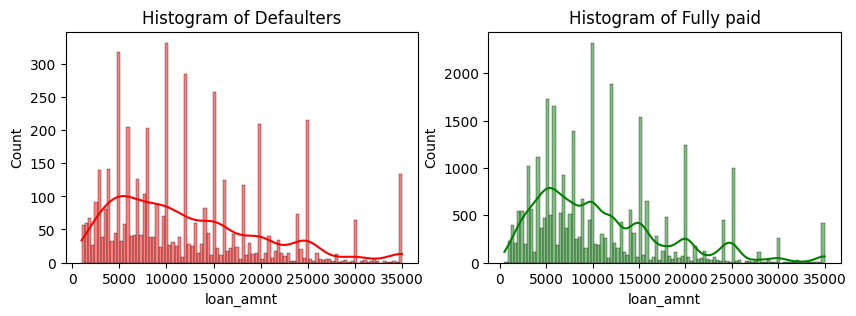

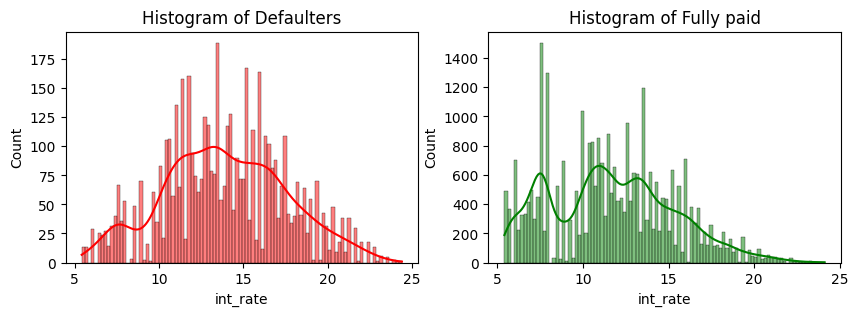

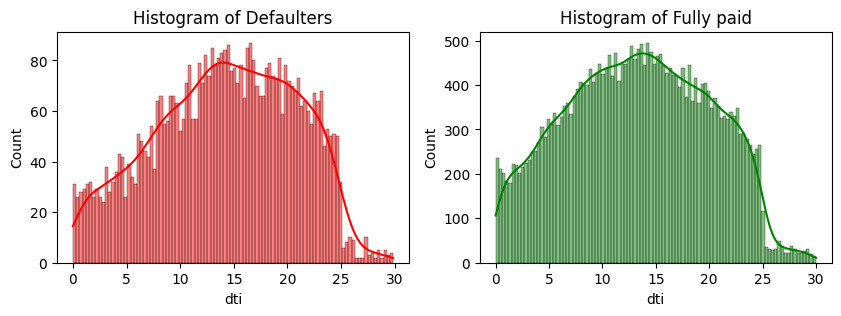

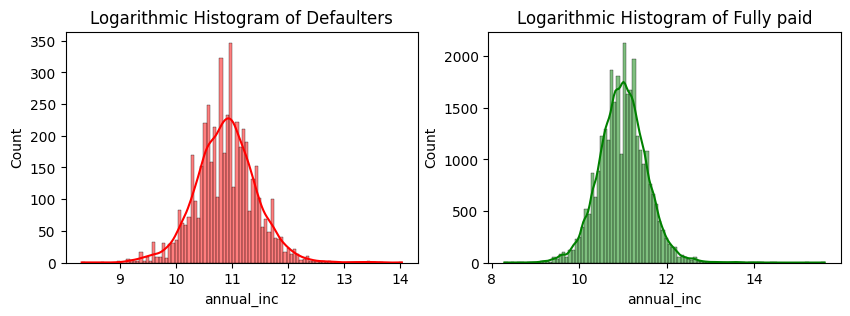

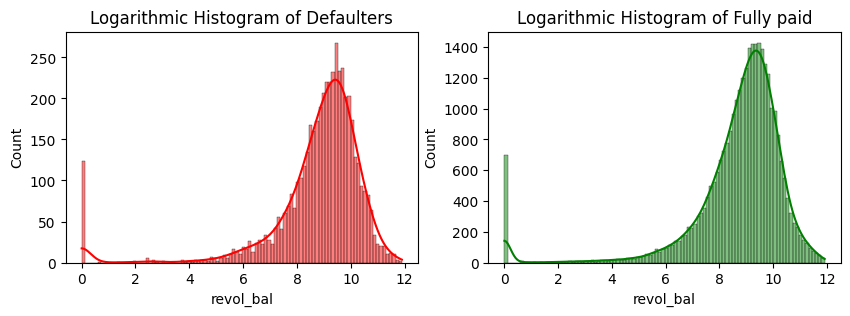

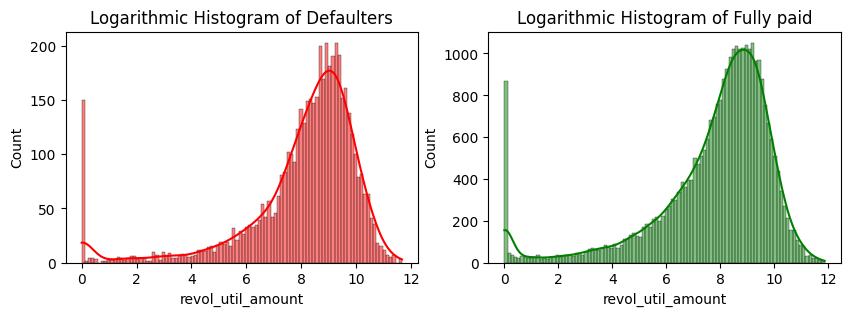

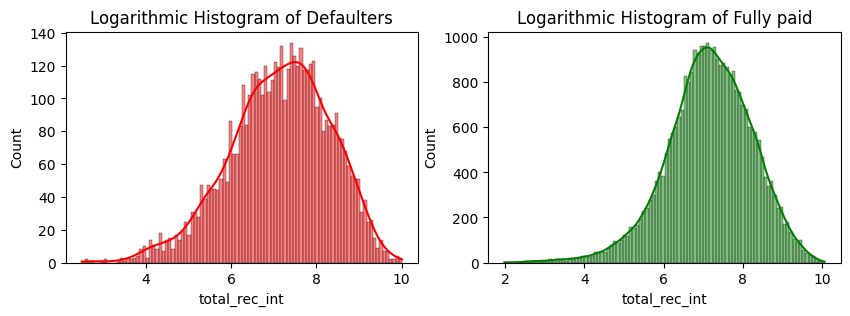

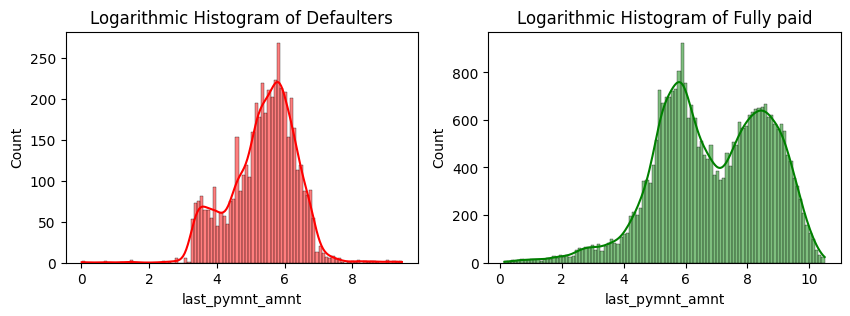

In [104]:
# let's take a look at histogram for all numerical columns discussed

view_as_is = ['loan_amnt', 'int_rate', 'dti']
view_as_log = ['annual_inc', 'revol_bal', 'revol_util_amount', 'total_rec_int', 'last_pymnt_amnt']
for n in view_as_is:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    sns.histplot(defaulters[n], bins=100, color="red", ax=axes[0], kde=True)
    axes[0].set_title('Histogram of Defaulters')
    sns.histplot(fully_paid[n], bins=100, color="green", ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Fully paid')

    plt.show()

for n in view_as_log:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    sns.histplot(np.log1p(defaulters[n]), bins=100, color="red", ax=axes[0], kde=True)
    axes[0].set_title('Logarithmic Histogram of Defaulters')

    sns.histplot(np.log1p(fully_paid[n]), bins=100, color="green", ax=axes[1], kde=True)
    axes[1].set_title('Logarithmic Histogram of Fully paid')

    plt.show()
    # plt.figure(figsize=(4,3))
    # df[n].hist(bins=100)
    # plt.title('Histogram of ' + n)
    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    # plt.show()

> * `int_rate` for defaulters seems to be tending higher in general than those who fully paid, for fully paid int_rate is higher towards the lower values. we can look deeper into it
> * `revol_util` seems to be grouped higher for defaulters than fully paid loans
> * `last_pymnt_amnt` is clearly higher for fully paid cases

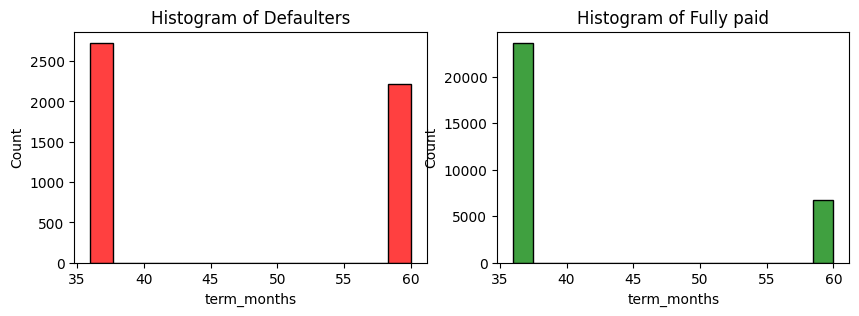

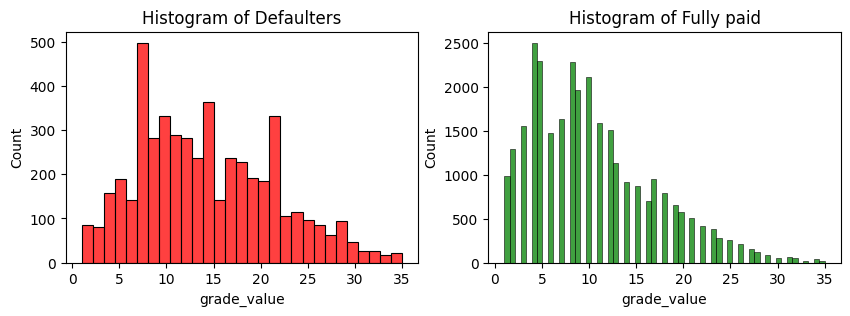

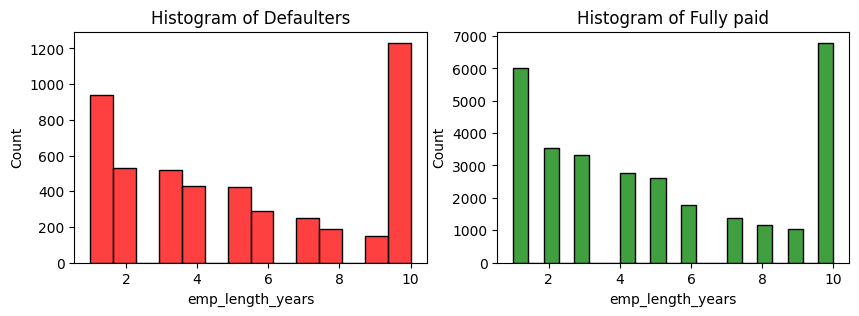

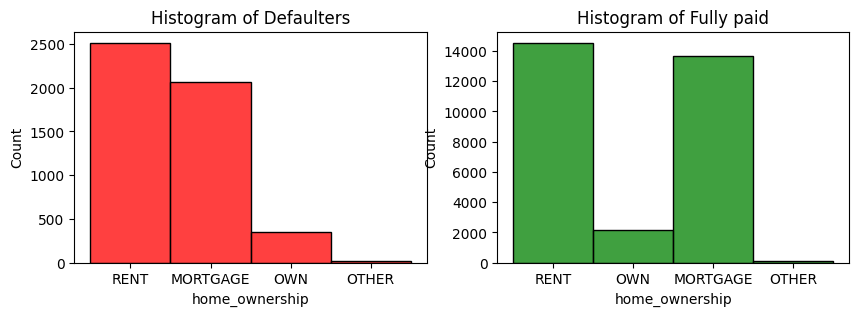

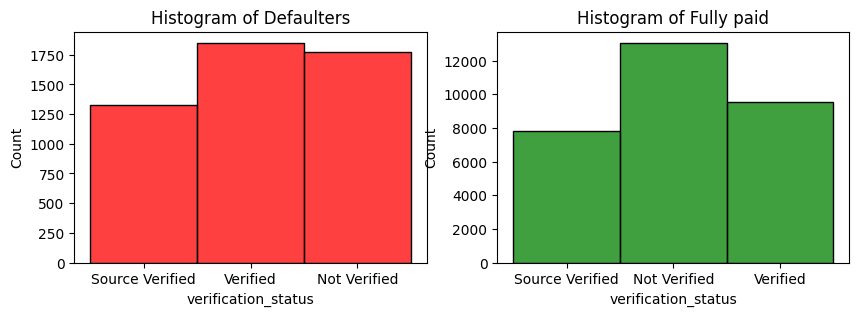

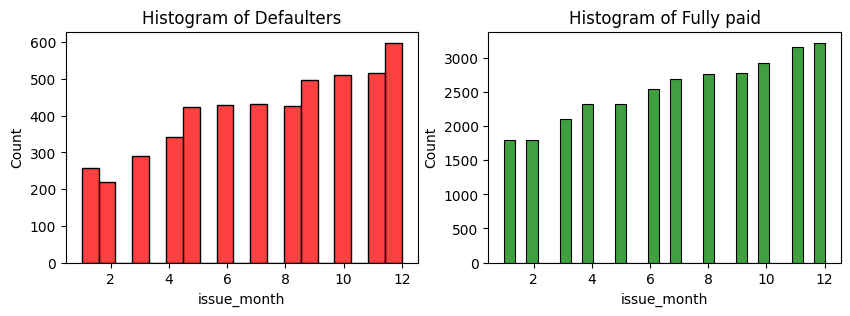

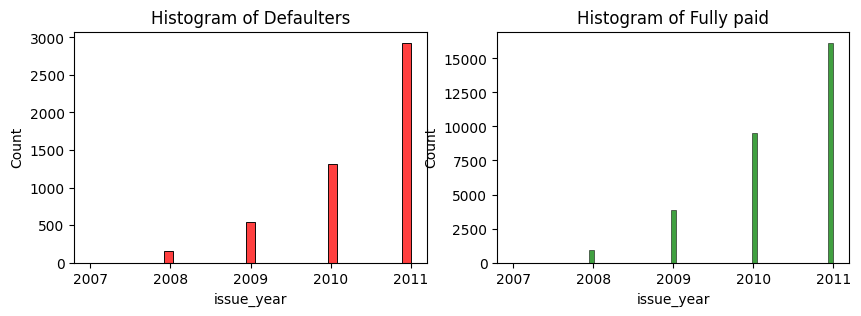

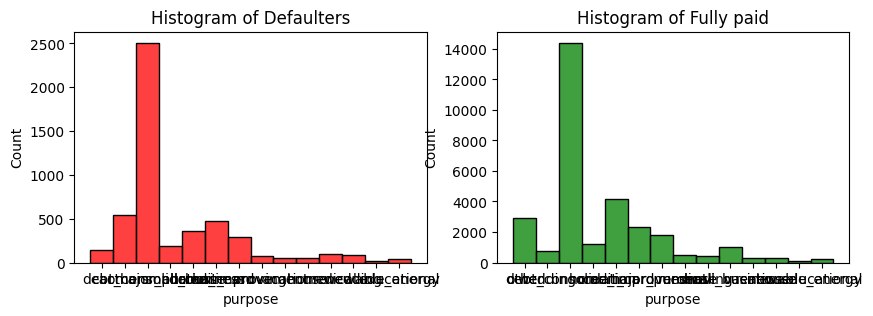

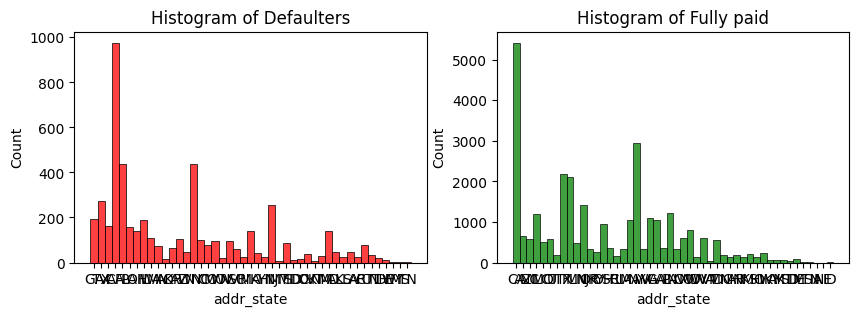

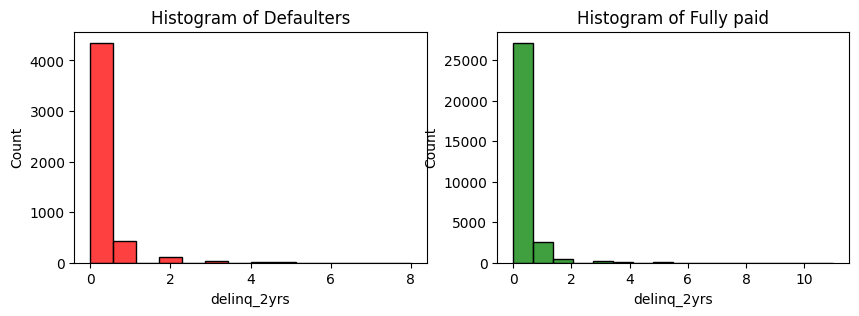

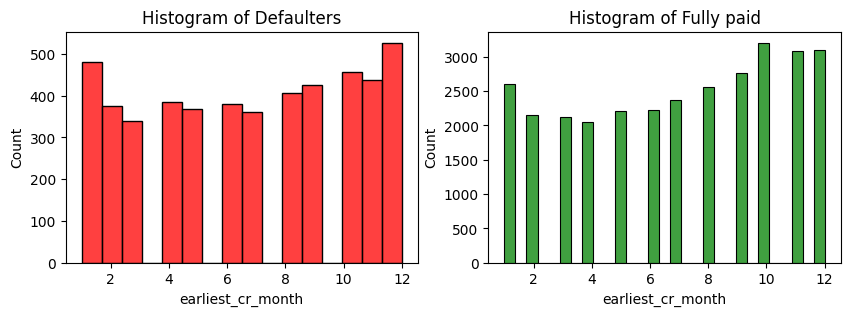

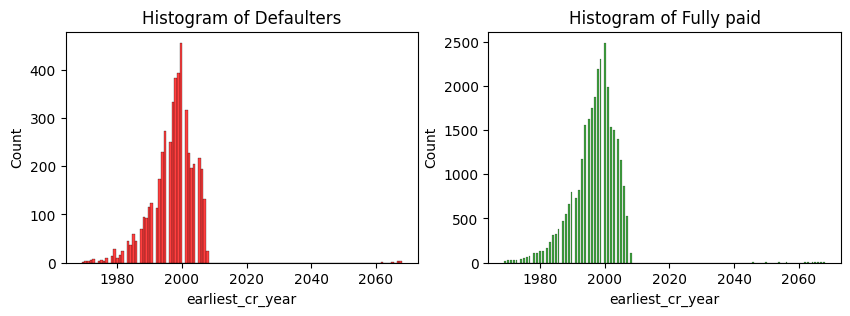

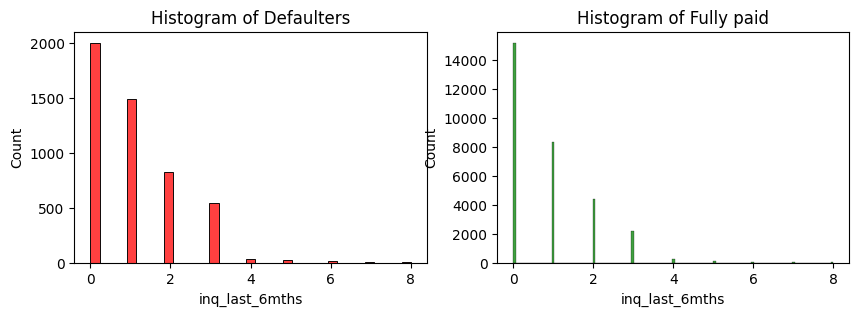

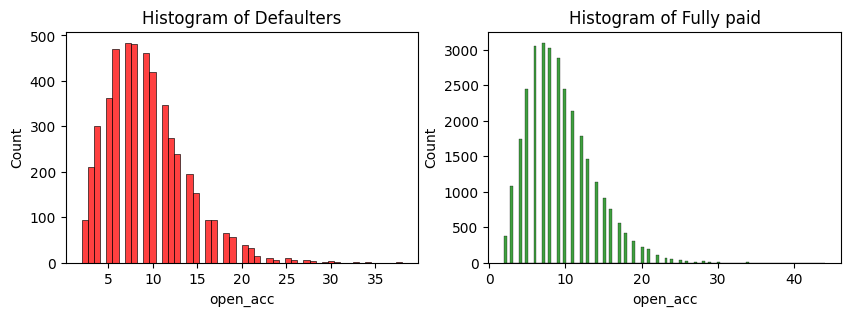

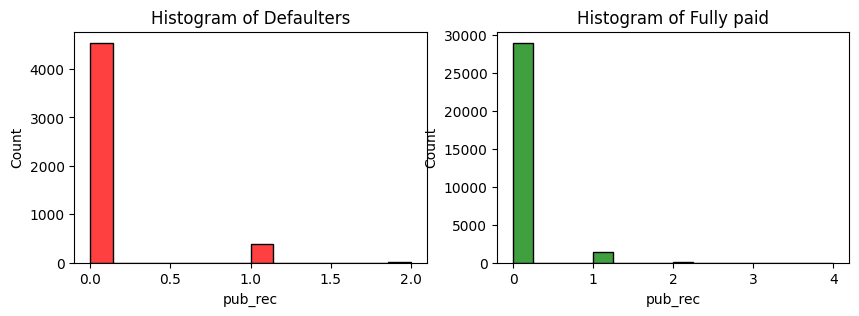

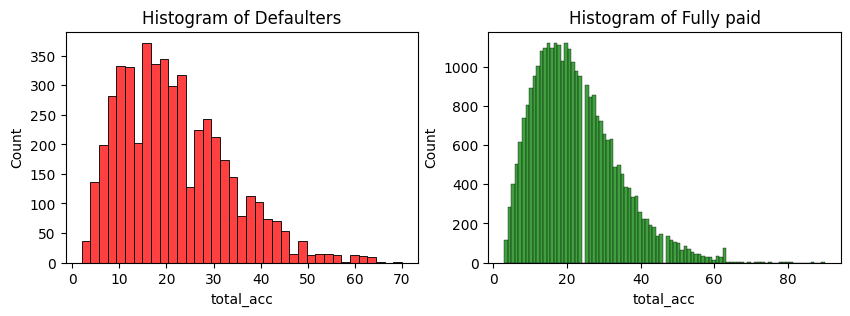

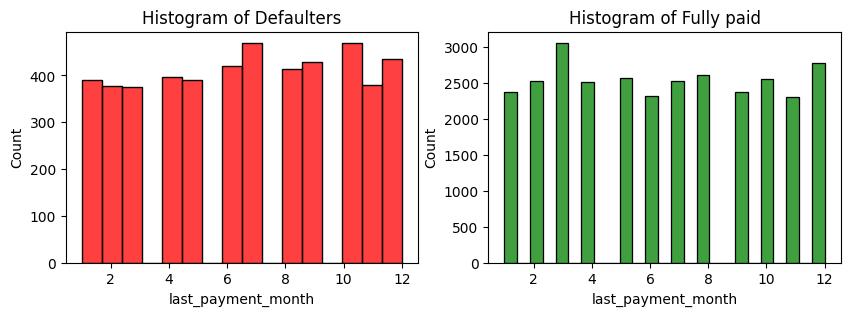

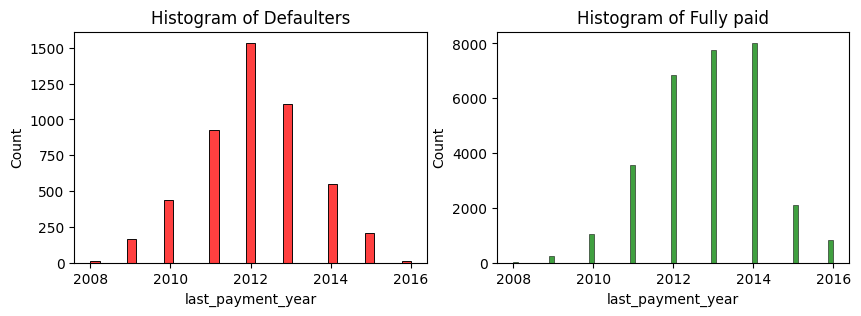

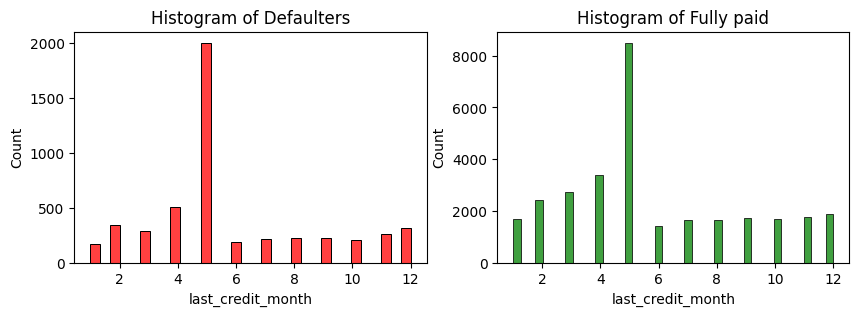

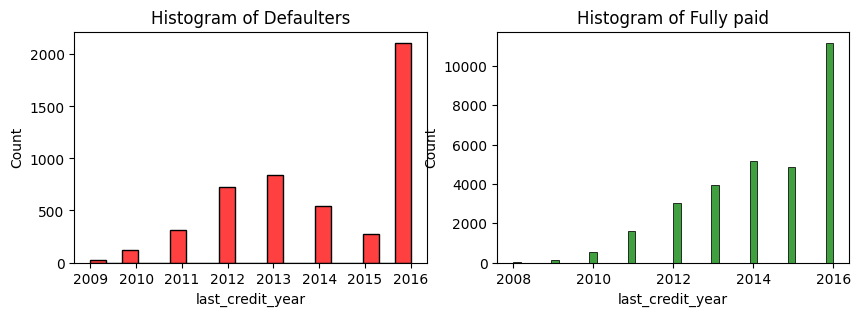

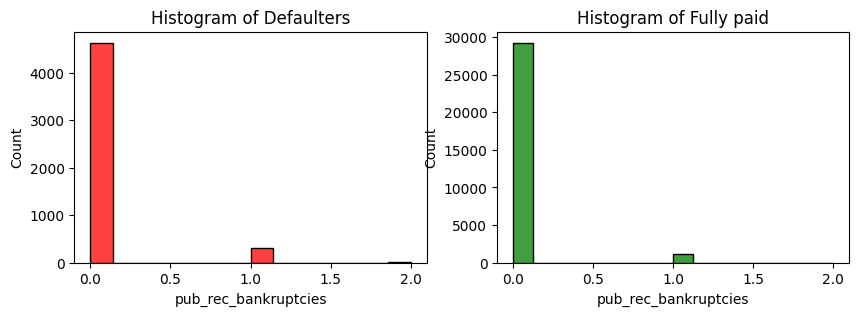

In [105]:
for c in categorical:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(defaulters[c], color="red", ax=axes[0])
    axes[0].set_title('Histogram of Defaulters')

    sns.histplot(fully_paid[c], color="green", ax=axes[1])
    axes[1].set_title('Histogram of Fully paid')

    plt.show()

### <font color='blue'> Bivariate analysis</font>

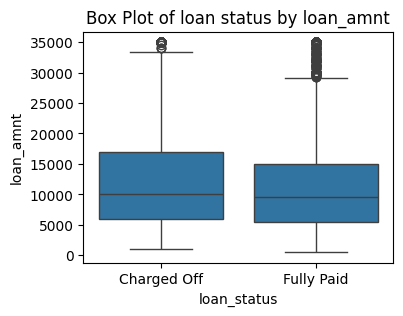

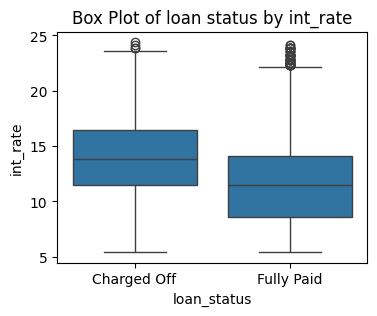

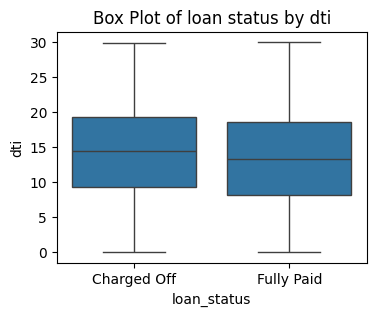

In [106]:
# Lets start with bivariate analysis first with the numerical column to see if we can find any relation
LOAN_STATUS = 'loan_status'
for n in view_as_is:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=LOAN_STATUS, y=n, data=df[df['loan_status']!='Current'])
    plt.title('Box Plot of loan status by ' + n)
    plt.show()

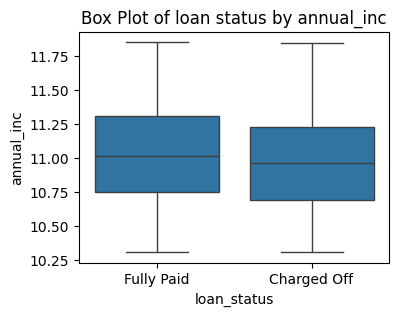

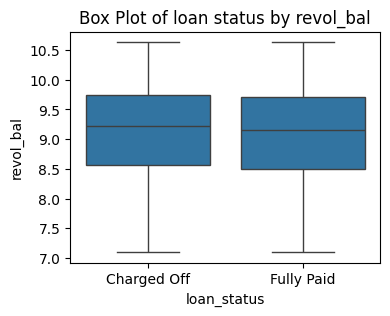

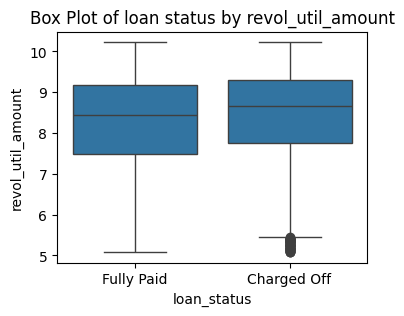

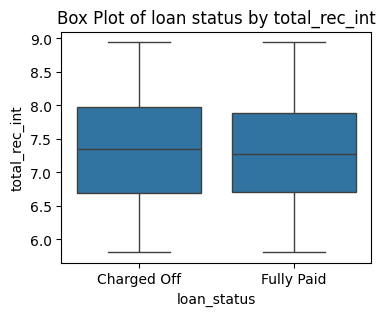

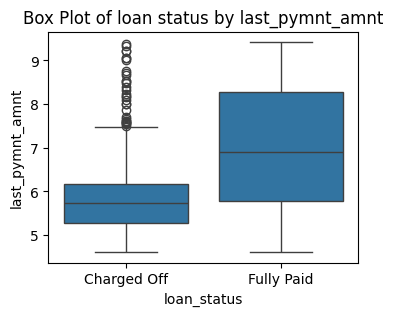

In [107]:
# Lets start with bivariate analysis first with the numerical column to see if we can find any relation
LOAN_STATUS = 'loan_status'
for n in view_as_log:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[(df[LOAN_STATUS]!='Current') & ( df[n] < df[n].quantile(0.95)) & ( df[n] > df[n].quantile(0.10))][LOAN_STATUS], y=np.log1p(df[(df[LOAN_STATUS]!='Current') & ( df[n] < df[n].quantile(0.95)) & ( df[n] > df[n].quantile(0.10))][n]))
    plt.title('Box Plot of loan status by ' + n)
    plt.show()

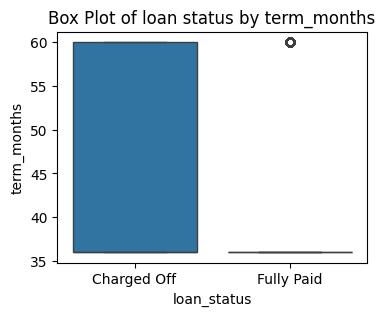

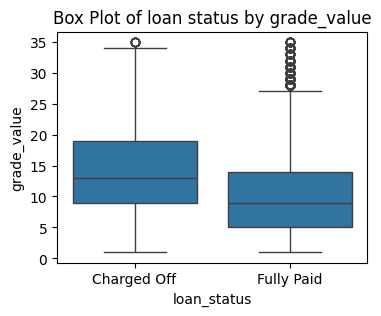

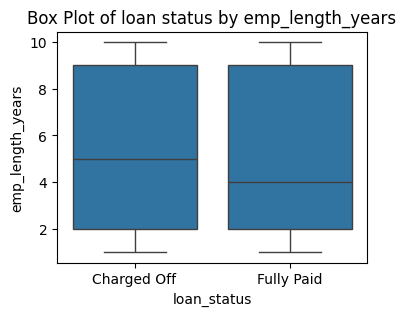

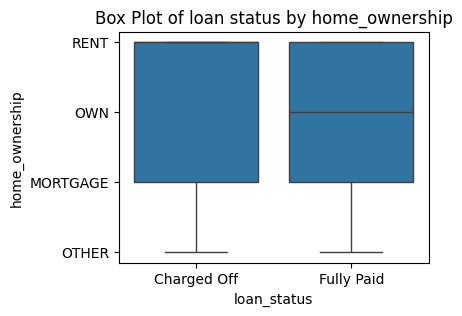

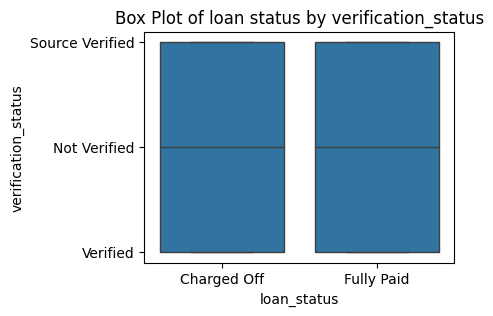

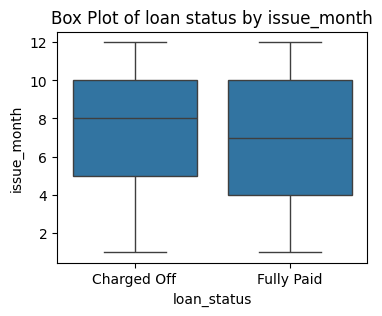

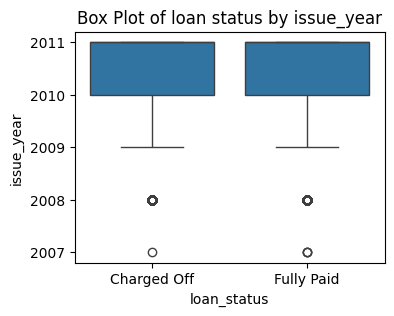

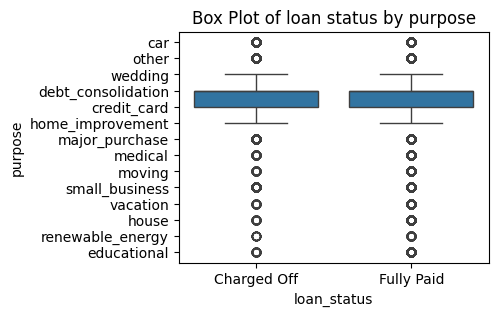

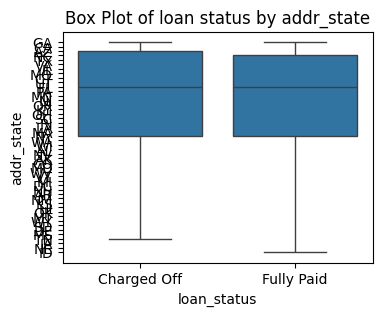

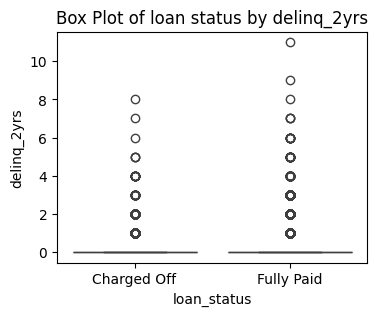

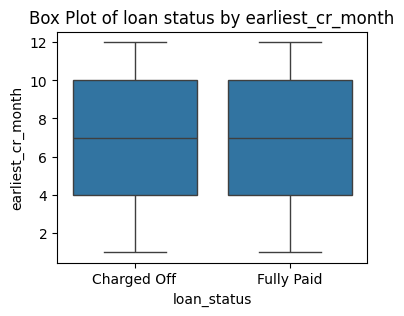

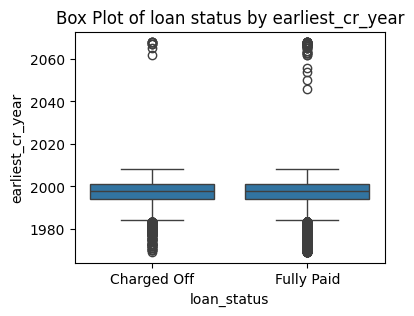

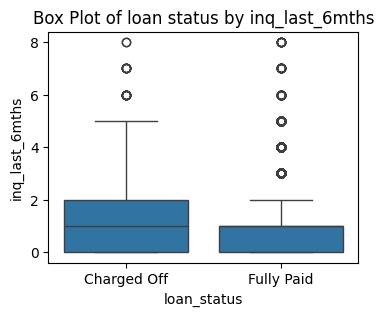

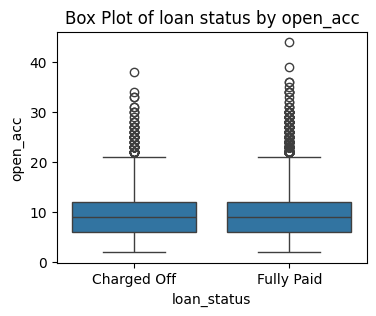

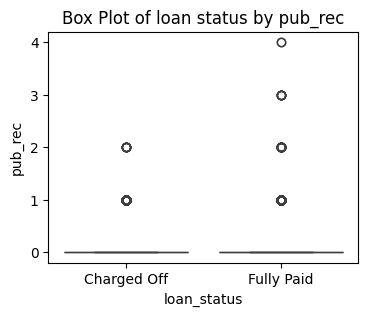

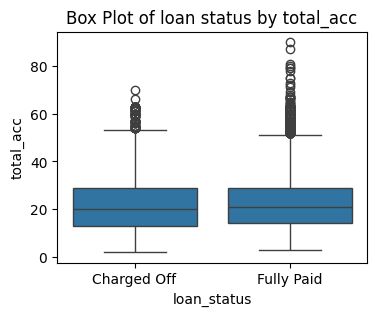

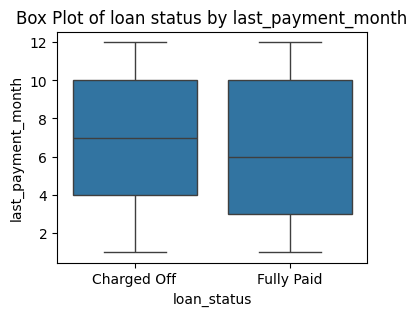

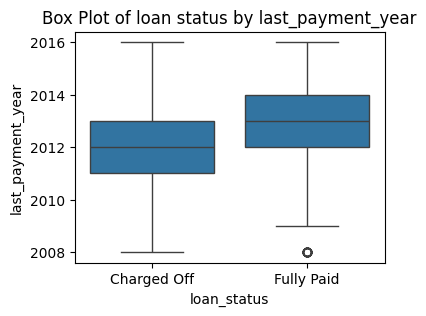

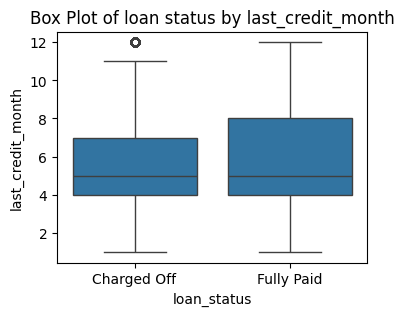

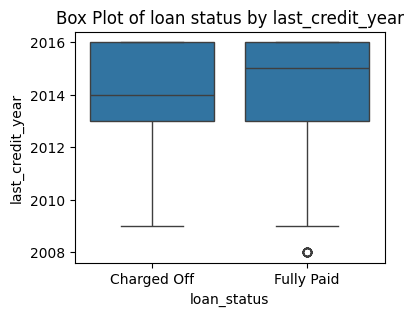

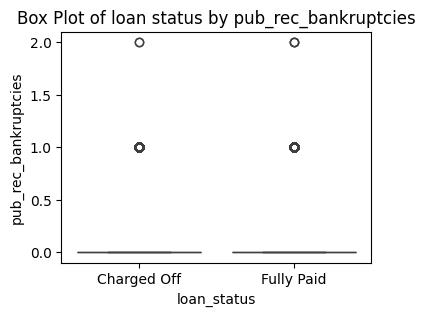

In [108]:
for n in categorical:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=LOAN_STATUS, y=n, data=df[df['loan_status']!='Current'])
    plt.title('Box Plot of loan status by ' + n)
    plt.show()

### <font color='blue'> More analyis on address as above graph was not clear</font>

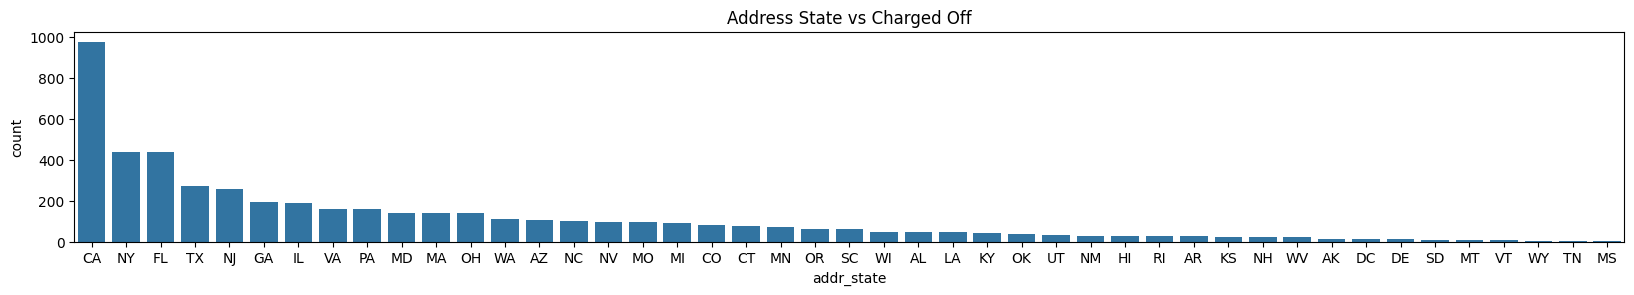

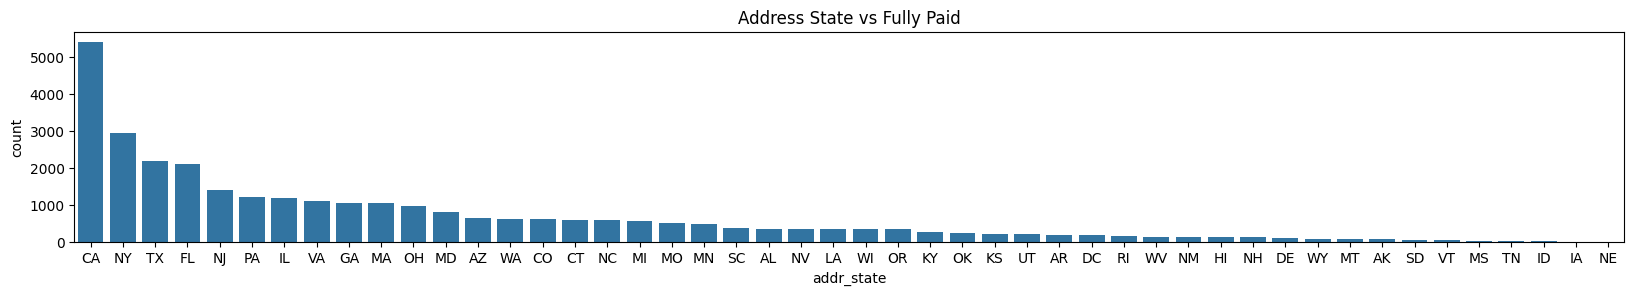

In [109]:
charged_off_df = df[df.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = df[df.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

#### Observations:
More number of borrowers defaulted in CA , FL and NY states.

### <font color='blue'> Recommendations: </font>
#### From above analysis we can say that:
- Higher loan amounts are riskier than lower loan amounts, need to do more due diligence when processing the same
- Borrower’s taking loan for the term 60 months has more chances of default.
- Borrower’s whose annual income is low i.e. (0-20000) has defaulted more.
- Borrower’s who receive higher interest at the rate of 15-20% are riskier.
- Borrower's from state CA, NY,TX and FL has higher chances of default.
- Borrower’s with lower Grades has higher chances of default.